# Livrable 1 - Pre-traitement des données et analyse exploratoire

## Contexte
Une agence immobilière voudrait optimiser sa proposition de biens aux futurs acheteurs tout en minimisant le nombre de visites en utilisant l’intelligence artificielle

### Donnéees
Les données sont issues du recensement de 1990 en Californie.

### Objectif
L’objectif de ce livrable est de préparer les données pour l’analyse exploratoire et de réaliser une analyse exploratoire des données.
Il s'agit donc de prétraiter des informations avant son exploitation dans un algorithme.

### Contraintes
- Les données sont fournies dans un fichier CSV.
- Utilisation de l'algorithme K-means pour la classification des données.

### Livrable
Le livrable est un notebook Jupyter contenant le code et les commentaires nécessaires à la compréhension du code.

## Charger les données
Puisque les données proviennent d'un fichier CSV, nous utiliserons la fonction read_csv de Pandas pour charger les données dans un DataFrame.

In [1]:
import os
import tarfile
from six.moves import urllib
import pathlib

#DOWNLOAD_ROOT = "https://github.com/ph10r/eiSpeInfoDS/raw/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
#HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

HOUSING_URL = str(pathlib.Path().resolve()) + "\housing.tgz"

# 1. Dézipper le fichier housing.tgz dans le dossier datasets/housing
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    # open file
    file = tarfile.open(housing_url)

    # extracting file
    file.extractall(housing_path)

    file.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
import numpy as np

# 2. Charger le fichier housing.csv dans un DataFrame
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path, sep=',')

In [4]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Étude des données

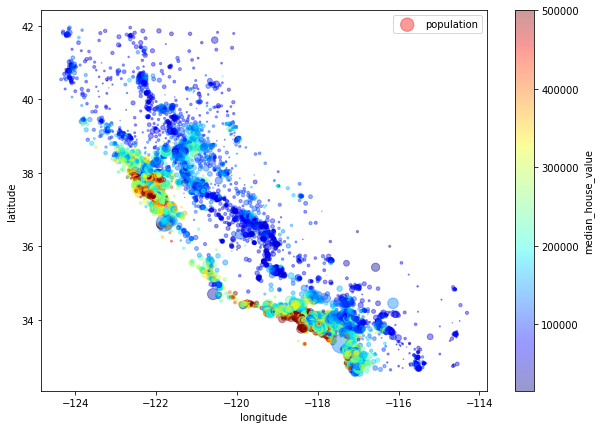

In [5]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

## Pré-traitement des données
Voici quelques étapes à suivre pour pré-traiter les données pour une utilisation avec K-means :

1. Nettoyer les données : Assurez-vous que vos données sont propres et ne contiennent pas de valeurs manquantes, de doublons ou d'autres anomalies. Si nécessaire, supprimez ou remplacez les données manquantes.

2. Normaliser les données : Normalisez les données en les mettant à l'échelle de sorte que chaque variable ait une plage de valeurs comparable. La normalisation peut être effectuée en utilisant la méthode de la moyenne et de l'écart type, la méthode de la plage ou la méthode de la normalisation de l'amplitude.

3. Réduire la dimensionnalité : Si vous travaillez avec des données à haute dimensionnalité, utilisez des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (PCA) pour réduire la dimensionnalité de vos données et faciliter leur analyse.

4. Identifier les valeurs aberrantes : Les valeurs aberrantes peuvent fausser les résultats de K-means, il est donc important de les identifier et de les traiter correctement. Les valeurs aberrantes peuvent être supprimées ou remplacées par des valeurs plus appropriées.

5. Sélectionner les caractéristiques : Si vous travaillez avec des données qui contiennent de nombreuses caractéristiques, il peut être judicieux de sélectionner les caractéristiques les plus pertinentes pour votre analyse.

En résumé, le pré-traitement des données pour K-means comprend le nettoyage des données, la normalisation des données, la réduction de la dimensionnalité, l'identification et le traitement des valeurs aberrantes et la sélection des caractéristiques. En effectuant ces étapes, vous pouvez améliorer la qualité de vos données et obtenir des résultats plus significatifs à l'aide de K-means.

### Nettoyer les données

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


On remarque que les données de ``total_bedrooms`` contiennent des valeurs manquantes. 20433 sur 20640. On a donc le choix :
- Supprimer l'instance
- Supprimer la _feature_
- Remplacer par une valeur (0, médiane, _etc_.)

Il n'y a pas de réponse unique, car la façon dont les valeurs manquantes sont traitées dépend du type de données et de l'analyse effectuée. Dans certains cas, remplacer les valeurs manquantes par la médiane peut être une meilleure option que de les supprimer. Voici quelques points à considérer pour prendre cette décision :

1. La fréquence des valeurs manquantes : Si le nombre de valeurs manquantes est important dans le jeu de données, la suppression de ces valeurs peut réduire considérablement la taille de votre jeu de données. Dans ce cas, il peut être préférable de remplacer les valeurs manquantes par la médiane plutôt que de les supprimer.

1. Le type de données : Le remplacement des valeurs manquantes par la médiane est particulièrement approprié pour les données numériques, car la médiane est une mesure de tendance centrale robuste qui n'est pas affectée par les valeurs aberrantes. Pour les données catégorielles, la suppression des valeurs manquantes peut être préférable.

1. L'impact sur l'analyse : Le remplacement des valeurs manquantes par la médiane peut modifier la distribution des données, ce qui peut avoir un impact sur l'analyse. Dans certains cas, cela peut être souhaitable, mais dans d'autres cas, cela peut affecter la validité des résultats.

En résumé, remplacer les valeurs manquantes par la médiane peut être une bonne option dans certains cas, mais pas dans tous les cas. Il est important de considérer la fréquence des valeurs manquantes, le type de données et l'impact sur l'analyse avant de prendre une décision.

> Pour notre jeu de données, puisque supprimer des données pourrait perdre des informations importantes, nous allons remplacer les valeurs manquantes par la médiane.

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

# index pour chaque colonne
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num = housing.select_dtypes(include=[np.number]) # or housing.select_dtypes(exclude=["object"])
housing_num_tr = num_pipeline.fit_transform(housing_num)

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [9]:
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

### Numériser les données
Les données sont numérisées pour pouvoir être traitées par l'algorithme K-means. C'est à dire que les données sont transformées en nombres.

In [10]:
from sklearn.preprocessing import OneHotEncoder

def numerize_cat(cat):
    cat_encoder = OneHotEncoder()
    return cat_encoder.fit_transform(cat).toarray()

In [11]:
ocean_proximity = numerize_cat(housing[["ocean_proximity"]])

## K-means
Le K-means est un algorithme de clustering qui est utilisé pour trouver des groupes de données similaires dans un ensemble de données non étiquetées. Avant de pouvoir appliquer K-means, il est important de pré-traiter les données pour s'assurer que l'algorithme fonctionne correctement et produit des résultats significatifs.

L'algorithme K-means comprend les étapes suivantes :
1. Choisir le nombre de clusters, k, que vous souhaitez créer.
2. Sélectionnez k points aléatoires à partir de votre ensemble de données, qui serviront de centres initiaux de vos clusters.
3. Pour chaque point de données, calculez la distance entre ce point et chaque centre de cluster.
4. Associez chaque point de données au centre de cluster le plus proche (en termes de distance).
5. Pour chaque cluster, calculez la moyenne de tous les points de données qui y sont associés, ce qui donnera un nouveau centre de cluster.
6. Répétez les étapes 3 à 5 jusqu'à ce que les centres de cluster ne bougent plus ou jusqu'à ce qu'un certain nombre d'itérations soit atteint.

Transcrit en Python, l'algorithme K-means ressemble à ceci :

In [12]:
import numpy as np
import random

def kmeans(data, k, max_iterations=100):
    n = data.shape[0]
    dimensions = data.shape[1]

    # Initialisation des centres de cluster
    centers = np.zeros((k, dimensions))
    for i in range(k):
        center_index = random.randint(0, n-1)
        centers[i] = data[center_index]

    # Boucle d'itération principale
    for iteration in range(max_iterations):
        # Initialisation des clusters
        clusters = [[] for _ in range(k)]

        # Attribution des points de données aux clusters les plus proches
        for point in data:
            distances = [np.linalg.norm(point - center) for center in centers]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Calcul des nouveaux centres de cluster
        new_centers = np.zeros((k, dimensions))
        for i, cluster in enumerate(clusters):
            new_center = np.mean(cluster, axis=0)
            new_centers[i] = new_center

        # Vérifier si les centres de cluster ont bougé
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return centers, clusters